In [2]:
import pandas as pd


In [16]:
df=pd.read_csv("interest rate.csv")
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,USA,LTINT,TOT,PC_PA,M,2007-01,4.76
1,USA,LTINT,TOT,PC_PA,M,2007-02,4.72
2,USA,LTINT,TOT,PC_PA,M,2007-03,4.56
3,USA,LTINT,TOT,PC_PA,M,2007-04,4.69
4,USA,LTINT,TOT,PC_PA,M,2007-05,4.75


In [17]:
df = df.drop(df.columns[[0,1,2,3,4]], axis=1)
df.head()

,TIME,Value
0,2007-01,4.76
1,2007-02,4.72
2,2007-03,4.56
3,2007-04,4.69
4,2007-05,4.75


Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1349
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1116
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0931
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0772
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0557
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0411
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0356
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0310
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 13/100
5/5 [==============================] - 0s 1ms/st

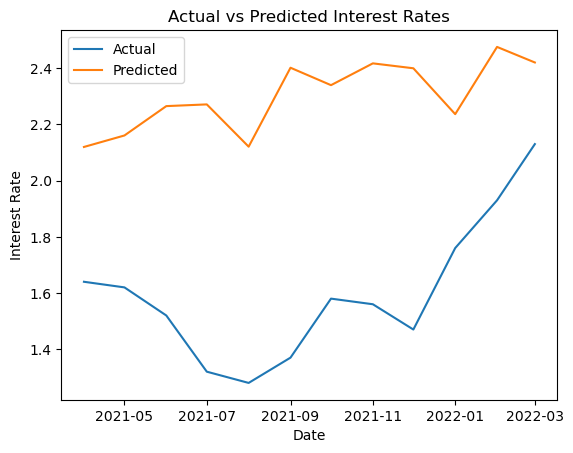

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Load the interest rate data into a pandas DataFrame

# Split the data into training and testing sets
train_data, test_data = train_test_split(df['Value'], test_size=0.2, shuffle=False)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data = scaler.transform(test_data.values.reshape(-1, 1))

# Convert the data into a format suitable for training a neural network
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 12):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[(i + look_back):(i + look_back + 12), 0])
    return np.array(X), np.array(Y)

look_back = 12 # use the previous 12 months' data to predict the next month's interest rate
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Create the ANN model
model = Sequential()
model.add(Dense(32, input_shape=(look_back,), activation='relu'))
model.add(Dense(12, activation='linear'))

# Train the ANN model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Use the trained model to make predictions on new data
future_data = df['Value'].values[-look_back:] # use the last 12 months' data to predict the next 12 months' interest rates
future_data = scaler.transform(future_data.reshape(-1, 1))
X_future = np.array([future_data])
predicted_rates = model.predict(X_future)
predicted_rates = scaler.inverse_transform(predicted_rates)
print('Predicted interest rates for the next 12 months:')
print(predicted_rates[0])

past_data = df['Value'].values[-24:-12]
past_dates = pd.to_datetime(df['TIME'][-24:-12], format='%Y-%m')
past_data_1 = scaler.transform(past_data.reshape(-1, 1))
X_past = np.array([past_data_1])
predicted = model.predict(X_past)
predicted = scaler.inverse_transform(predicted)
plt.plot(past_dates, past_data, label='Actual')
plt.plot(past_dates, predicted[0], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.title('Actual vs Predicted Interest Rates')
plt.legend()
plt.show()
